In [1]:
# Task 5: Decision Trees and Random Forests

# Objective: Learn tree-based models for classification using heart disease data.

# --- Step 1: Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sns.set(style="whitegrid")


In [2]:
# --- Step 2: Load the dataset
df = pd.read_csv("heart.csv")
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
# --- Step 3: Split features and target
X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# --- Step 4: Train Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42, max_depth=4)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))


Decision Tree Accuracy: 0.8


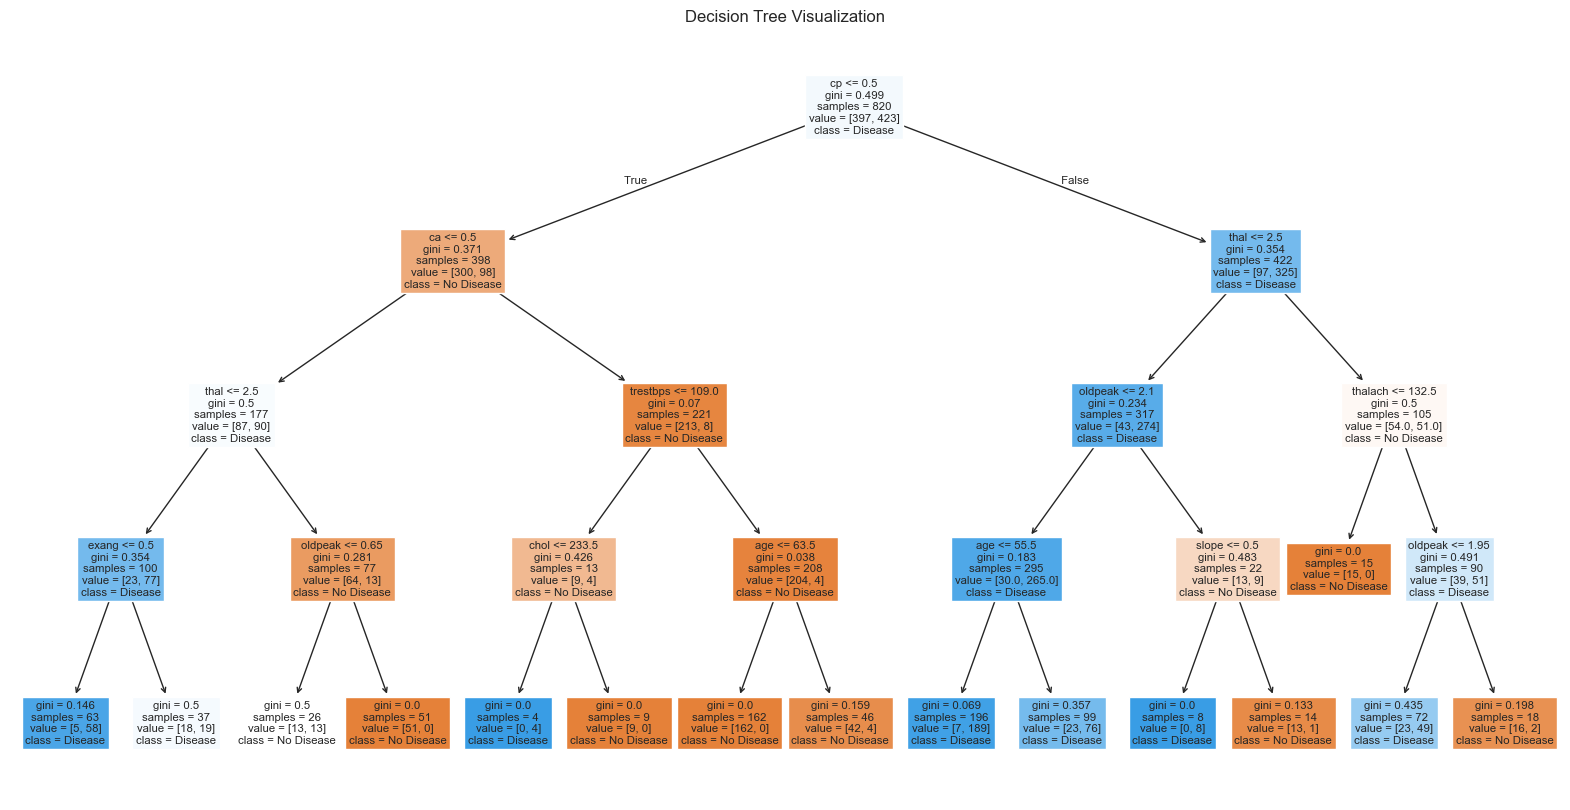

In [5]:
# --- Step 5: Visualize the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt_model, feature_names=X.columns, class_names=["No Disease", "Disease"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()


In [6]:
# --- Step 6: Train Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42, n_estimators=100)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))


Random Forest Accuracy: 0.9853658536585366


In [7]:
# --- Step 7: Classification Report for Random Forest
print("Classification Report (Random Forest):")
print(classification_report(y_test, y_pred_rf))


Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.97      1.00      0.99       102
           1       1.00      0.97      0.99       103

    accuracy                           0.99       205
   macro avg       0.99      0.99      0.99       205
weighted avg       0.99      0.99      0.99       205



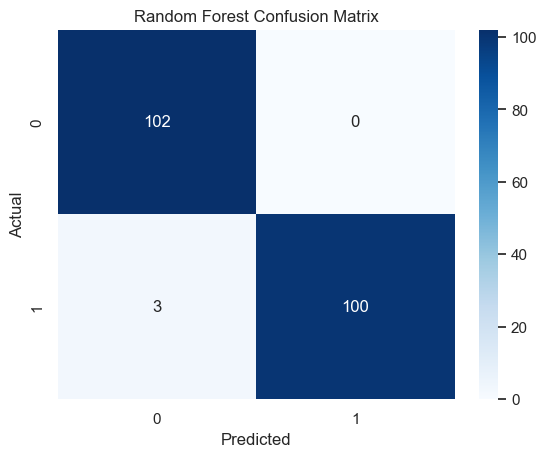

In [8]:
# --- Step 8: Confusion Matrix (Random Forest)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix_rf, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


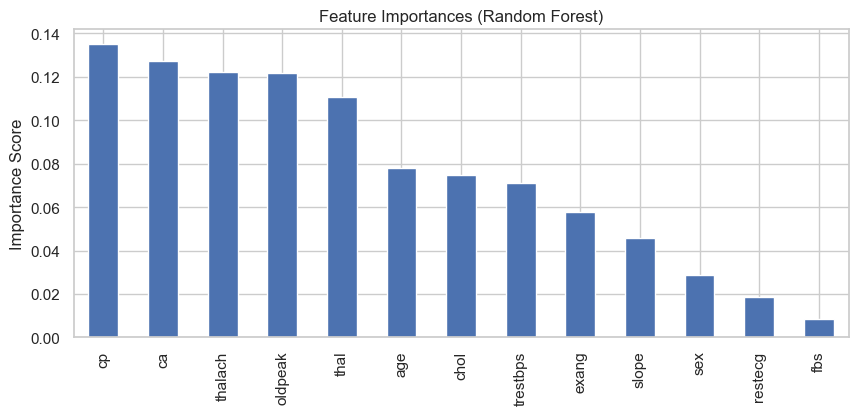

In [9]:
# --- Step 9: Feature Importances
importances = pd.Series(rf_model.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).plot(kind='bar', title='Feature Importances (Random Forest)', figsize=(10, 4))
plt.ylabel("Importance Score")
plt.show()


In [10]:
# --- Step 10: Cross-Validation Scores
dt_cv = cross_val_score(dt_model, X, y, cv=5).mean()
rf_cv = cross_val_score(rf_model, X, y, cv=5).mean()

print("Decision Tree CV Score:", dt_cv)
print("Random Forest CV Score:", rf_cv)


Decision Tree CV Score: 0.8341463414634147
Random Forest CV Score: 0.9970731707317073
